# **Download the data!**

In [0]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(520)
a = np.random.randint(1, 10,5)
b = np.random.randint(1, 10, 5)
c = np.array([0.01,0.02,0.03,0.04,0.05])
d = np.array([-0.01,0.03,0.04,0.05,0.06])
print(a, b)

MAE = mean_absolute_error(c,d)
print("MAE =", MAE)
RMSE = mean_squared_error(c, d)
print("RMSE = ", RMSE)


[5 4 3 2 9] [2 4 8 9 8]
MAE = 0.012
RMSE =  0.00016


In [0]:
from google.colab import drive
drive.mount('/AlohaMyDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /AlohaMyDrive


In [0]:
!pwd

/content


In [0]:
%cd /AlohaMyDrive

/AlohaMyDrive


In [0]:
%cd My Drive

/AlohaMyDrive/My Drive


In [0]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

In [0]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(HOUSING_PATH)

datasets/housing


In [0]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [0]:
fetch_housing_data()
housing = load_housing_data()

In [0]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
housing.info() # Notice number of attributes!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing['ocean_proximity'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Please try to see other attributes

In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


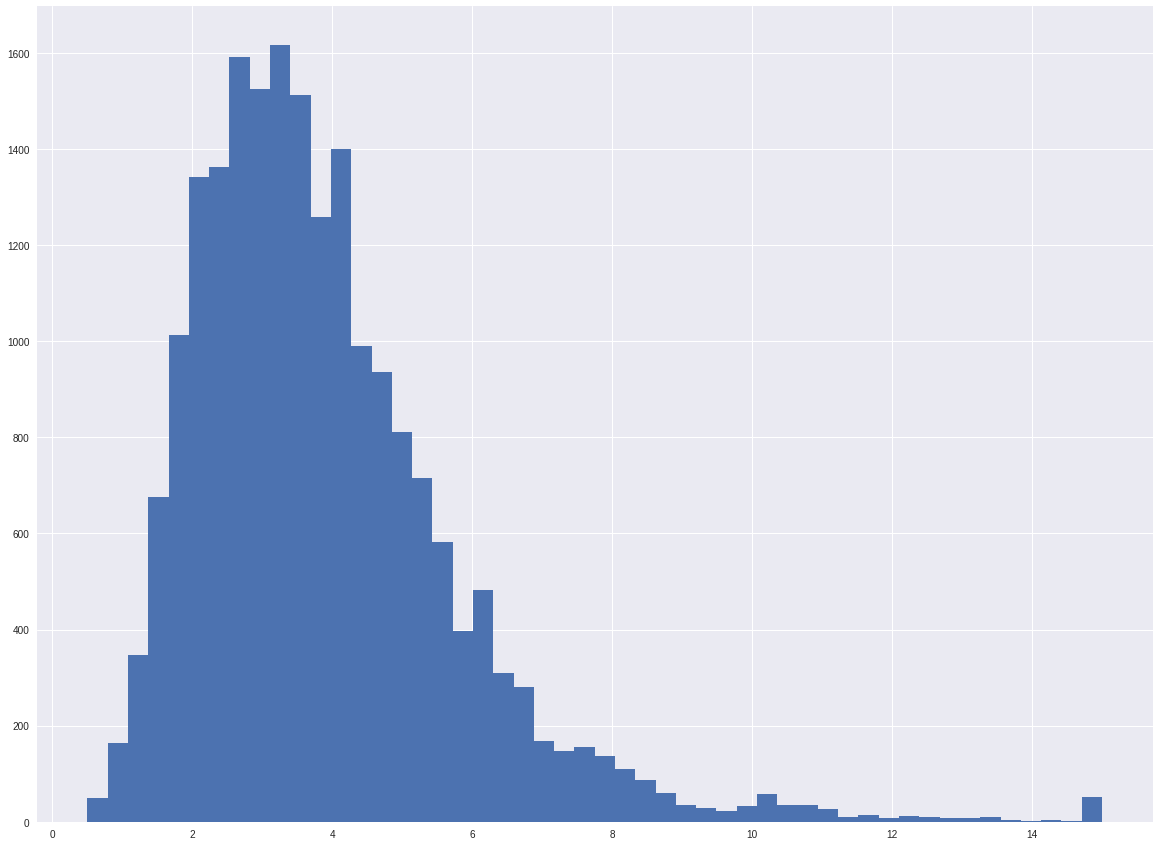

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

housing['median_income'].hist(bins=50, figsize=(20,15))

#Notice
1. First, the median income attribute does not look like it is expressed in US dollars (USD). After
checking with the team that collected the data, you are told that the data has been scaled and capped
at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median
incomes. Working with preprocessed attributes is common in Machine Learning, and it is not
necessarily a problem, but you should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The latter may be a serious
problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn
that prices never go beyond that limit. You need to check with your client team (the team that will use
your system’s output) to see if this is a problem or not. If they tell you that they need precise
predictions even beyond 500000, then you have mainly two options:
  *   Collect proper labels for the districts whose labels were capped.
   *   Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond 500,000



3. Scale
4. Heavy Tail




#Create a Test Set

### Why we need a test dataset separted from training dataset?

In [0]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data)) # Randomly permute a sequence, or return a permuted range.
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train and", len(test_set), "test")

16512 train and 4128 test


In [0]:
train_set.head(5) # Please try it a couple of times to see the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17472,-119.85,34.48,23.0,1915.0,277.0,724.0,267.0,6.2987,348200.0,NEAR OCEAN
15072,-116.98,32.80,28.0,5721.0,1029.0,2672.0,1054.0,3.9630,164400.0,<1H OCEAN
10666,-117.86,33.61,15.0,3191.0,482.0,930.0,447.0,8.6001,500001.0,<1H OCEAN
7012,-118.07,33.96,30.0,928.0,230.0,913.0,214.0,2.6991,147100.0,<1H OCEAN
16565,-121.46,37.73,20.0,2039.0,373.0,862.0,330.0,5.1629,222900.0,INLAND


## How about to set a seed?

In [0]:
np.random.seed(55)

#Sklearn is the King!!!

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=520)

In [0]:
train_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17509,-121.90,37.34,52.0,241.0,69.0,385.0,64.0,2.6190,212500.0,<1H OCEAN
3463,-118.45,34.31,28.0,1532.0,287.0,977.0,275.0,4.4773,173100.0,<1H OCEAN
5308,-118.44,34.05,32.0,1880.0,435.0,798.0,417.0,4.7109,500000.0,<1H OCEAN
4384,-118.27,34.09,44.0,3646.0,912.0,1783.0,861.0,2.9709,225000.0,<1H OCEAN
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN


##Let's come back to slides for a while

In [0]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) # Why 1.5? hint: representive!
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) # Ignore outlier

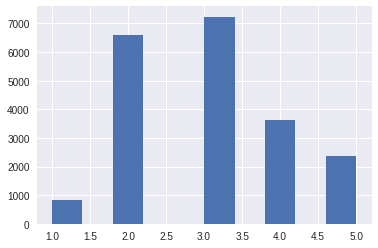

In [0]:
housing["income_cat"].hist()

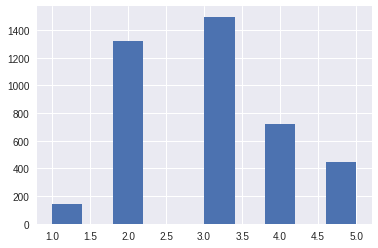

In [0]:
test_set['income_cat'] = np.ceil(test_set['median_income'] / 1.5) 

test_set['income_cat'].where(test_set['income_cat']<5, 5.0, inplace=True)
test_set['income_cat'].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [0]:
#print(housing["median_income"].value_counts() / len(housing)) ## Could you see the difference between training, test and sampling?

print(train_set['income_cat'].value_counts() /len(train_set))
print(test_set['income_cat'].value_counts()/len(test_set))

3.0    0.347565
2.0    0.318617
4.0    0.176599
5.0    0.116037
1.0    0.041182
Name: income_cat, dtype: float64
3.0    0.362645
2.0    0.319767
4.0    0.175145
5.0    0.108043
1.0    0.034399
Name: income_cat, dtype: float64


In [0]:
for set_ in (strat_train_set, strat_test_set): ## Recover to origin data
  set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


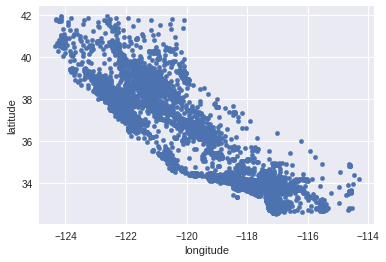

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude")


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


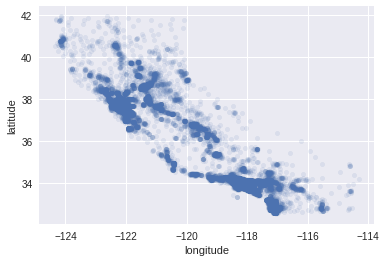

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) ## Why not to see the Google Map?


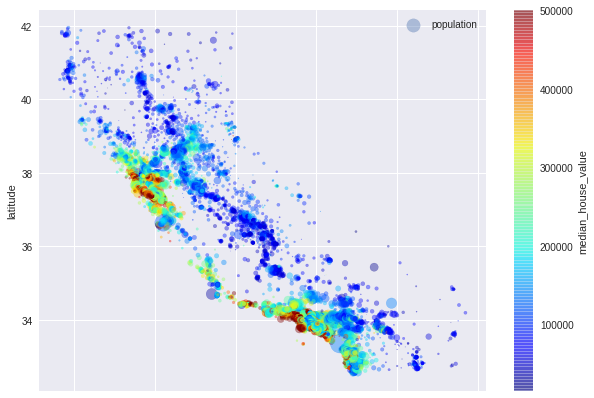

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
  s=housing["population"]/100, label="population", figsize=(10,7),
  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
) 
plt.legend()

## What the above figure tell?

House prices? 
1. location 
2. location 
3. location

### What feature denote that?

In [0]:
corr_matrix = housing.corr()

In [0]:
corr_matrix["median_house_value"].sort_values(ascending=False) ## Person Corrlation 

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Let's come back to slides again..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49c48a6240>,
      dtype=object)

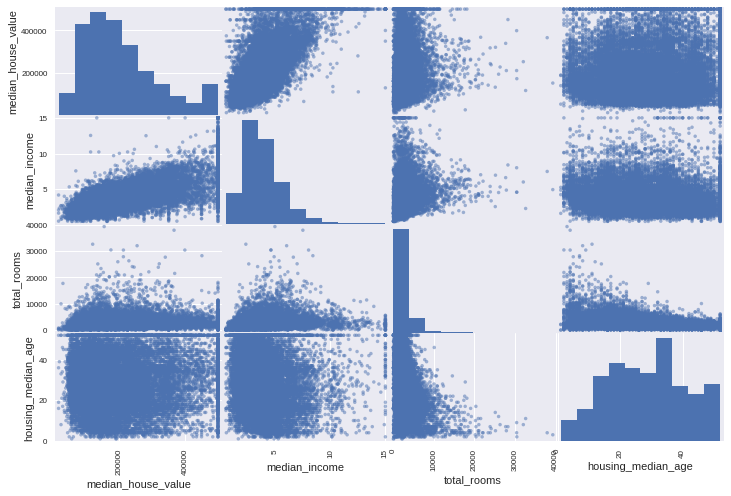

In [0]:
## What feature do you think is most relevant to predict the housing price?

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


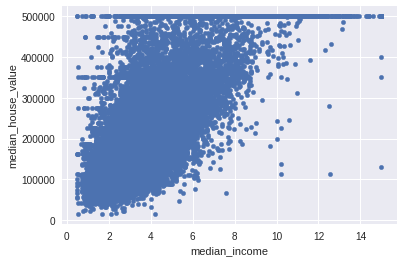

In [0]:
housing.plot(kind="scatter", x="median_income", y="median_house_value") ## What can you see weird from this figure?
housing.head(5)

# Experimenting with Attribute Combination

In [0]:
# Can you think more features?
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [0]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

1. This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you
get a fresh dataset).
2. You will gradually build a library of transformation functions that you can reuse in future projects.
3. You can use these functions in your live system to transform the new data before feeding it to your
algorithms.
4. This will make it possible for you to easily try various transformations and see which combination
of transformations works best.

In [0]:
housing = strat_train_set.drop("median_house_value", axis=1) # recover to the origin data
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning (Missing Value)
* Get rid of the the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.).

In [0]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

## Which one is the best as you think? Could you think a better option?

## Let's do a more fantastic way!

In [0]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")


In [0]:
housing_num = housing.drop("ocean_proximity", axis=1) # Why we do that first?

In [0]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [0]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [0]:
X = imputer.transform(housing_num)

In [0]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Scikit-Learn is an art!
Let's go to the slides!

## Handling Text and Categorical Attributes

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [0]:
print(encoder.classes_) # Is this good enough?

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [0]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [0]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [0]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer() ## sparse matrix and dense one
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

## Custom Transformers

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]*
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
      bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

SyntaxError: ignored

## Feature Scaling

* Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.
* Standardization is quite different: first it subtracts the mean value (so standardized values always have a
zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike
min-max scaling, standardization does not bound values to a specific range, which may be a problem for
some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income
equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–
0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called
StandardScaler for standardization.

## Transformation Pipelines

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribes_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

NameError: ignored

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

In [0]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [0]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_attribs)),
  ('imputer', Imputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
  ])
cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_attribs)),
  ('label_binarizer', MyLabelBinarizer()),
  ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## How to join these two pipelines into a single pipeline

In [0]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
  ])

In [0]:
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)
print(housing_prepared.shape)

[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]
(16512, 17)


## Select and Train a Model

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

NameError: ignored

In [0]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [0]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [0]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
## Why result is so good?

0.0

## Better Evaluation Using Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

NameError: ignored

In [0]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [0]:
display_scores(tree_rmse_scores)

Scores: [70153.50981344 66622.70046307 70755.81739    69306.69855333
 69427.27816239 75655.08938045 70192.60393144 70378.29625191
 76997.02542367 69962.28847664]
Mean: 70945.13078463332
Standard deviation: 2915.4238065602294


In [0]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)o

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean: 68828.99948449328
Standard deviation: 2662.7615706103393


In [0]:
## RF How to fix it?
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
print(forest_rmse)

display_scores(forest_rmse_scores)&

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NameError: ignored

## Fine-Tune Your Model
*Come to slides

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

In [0]:
grid_search.best_estimator_

In [0]:
cvres = grid_search.cv_results_

In [0]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
... print(np.sqrt(-mean_score), params)

###Could you try the randon search?

## Analyze the Best Models and Their Errors

In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [0]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

## Evaluate your system on the Test Set

In [0]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)